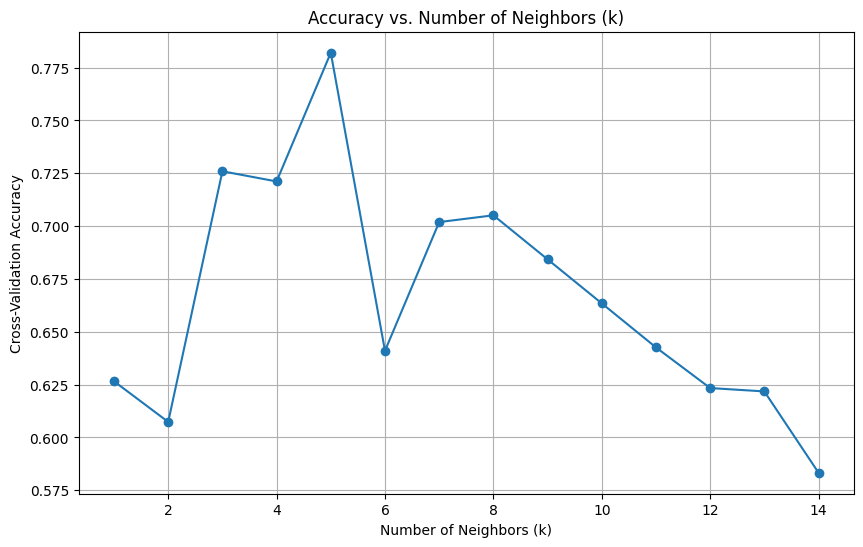

n: 5, mean_score: 0.782051282051282
Test score: 0.8461538461538461


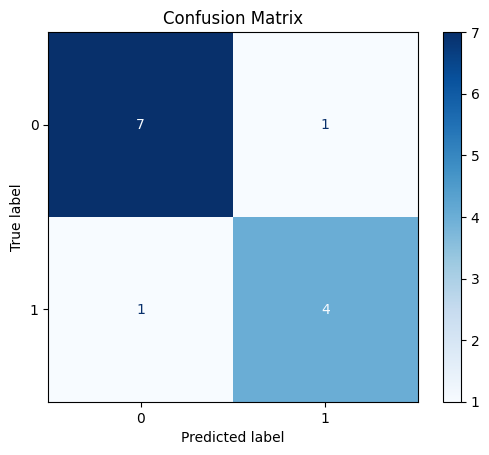

In [1]:
from itertools import chain
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from icecream import ic
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Prepare data
df = pd.read_csv('data/dataset_2.csv', dtype={'V1': str, 'target': int})
df = shuffle(df)

X = []
y = []

for row in df.iterrows():
    i = row[1]['V1']
    o = row[1]['target']
    
    b = list(map(int, i)) # Convert each string element to an integer
    X.append(b)
    y.append(o)
    
split_ratio = 0.8
X_split_index = int(len(X) * split_ratio)
y_split_index = int(len(y) * split_ratio)

X_train = X[:X_split_index]     # First 80% of the data
y_train = y[:y_split_index]     # First 80% of the labels
X_test = X[X_split_index:]      # Remaining 20% of the data
y_test = y[y_split_index:]      # Remaining 20% of the labels

k = 4  # k value in k-fold cross-validation: number of parts we randomly split our training data set into.
X_train_parts = list(split(X_train, k))
y_train_parts = list(split(y_train, k))
    
mean_scores = []    
    
n_neighbors = 15
for n in range(1, n_neighbors):
    n_scores = []
    
    # Perform k-fold cross-validation
    for i in range(k):
        X_cv_part = X_train_parts[i]
        y_cv_part = y_train_parts[i]
        
        X_train_merged = list(chain.from_iterable([X_train_parts[j] for j in range(k) if j != i]))
        y_train_merged = list(chain.from_iterable([y_train_parts[j] for j in range(k) if j != i]))
        
        knn = KNeighborsClassifier(n_neighbors=n)
        mod = knn.fit(X_train_merged, y_train_merged)

        y_pred = mod.predict(X_cv_part)
        score = accuracy_score(y_cv_part, y_pred)
        n_scores.append(score)
    
    mean_scores.append({
        'n': n,
        'mean_score': np.mean(n_scores)
    })

# Extract the number of neighbors and mean scores from the cross-validation results
n_values = [item['n'] for item in mean_scores]
mean_scores_values = [item['mean_score'] for item in mean_scores]

# Plot Accuracy vs. Number of Neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_values, mean_scores_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

# Self note: lambda x defines a lambda function that takes one argument x and returns x['mean_score']
highest_score = max(mean_scores, key=lambda x:x['mean_score'])
print(f'n: {highest_score["n"]}, mean_score: {highest_score["mean_score"]}')

# Perform prediction on unseen data using the best k value
knn = KNeighborsClassifier(n_neighbors=highest_score['n'])
mod = knn.fit(X_train, y_train)
y_pred = mod.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Test score: {score}')

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
    


    
    